# (Towards) an interactive evaluation of the Mason-Weaver concentration profile

This Notebook enables to conveniently set the nanoparticle solution parameters using physical quantities and units typically used in real-life laboratory situations and directly obtain a concentration profile. At present, we do not provide any interactive sliders with real-time graph redrawing. For now, set the physical quantities defining the systems in Cell #5 and then re-evaluate the Notebook.

A very nice HTML5/JavaScript app for plotting the Mason-Weaver concentration profiles has been developed by Steven Abbott:

https://www.stevenabbott.co.uk/practical-solubility/Gravitational-Sedimentation.php

In [1]:
from numpy import pi
from scipy.constants import Boltzmann as k_B
from scipy.constants import g

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from masonweaver_analytic import MW_c_profile

In [4]:
# User-interface unit (UI units)
_r_p = 41. # nm
_rho_p = 10.41 # g/cc
_rho_l = 1.01 # g/cc
_eta = 2.2 # cP
_h = 2.6 # mm
_t = 6 # h
_T = 25. # °C
_relmax = 4

In [5]:
# conversion from UI units to SI
# Incidentally, this also ensures that all variables are floating point.
r_p = _r_p * 1e-9 # m
rho_p = _rho_p * 1000. # kg m3
rho_l = _rho_l * 1000. # kg m3
eta = _eta * 1e-3 # Pa.s
h = _h * 1e-3 # m
t = _t * 3600. # s
T = _T + 273.15 # K

In [6]:
# rename variables to be compatible with expression from the PPSC 2017 paper
a = r_p
z_max = h

In [7]:
D = (k_B*T)/(6*pi*eta*a)

In [8]:
s = 2/9 * (a**2 * (rho_p - rho_l))/eta
sg = s*g

In [9]:
print(D, 'm2 s-1')
print(s, 's-1')
print(sg, 'm s-1')

2.4210872227778505e-12 m2 s-1
1.5961010101010104e-09 s-1
1.5652403970707073e-08 m s-1


In [10]:
solnz, solnc = MW_c_profile(t, z_max, D, sg, Nz = 500)

Text(0, 0.5, 'rel. height (% of z_max)')

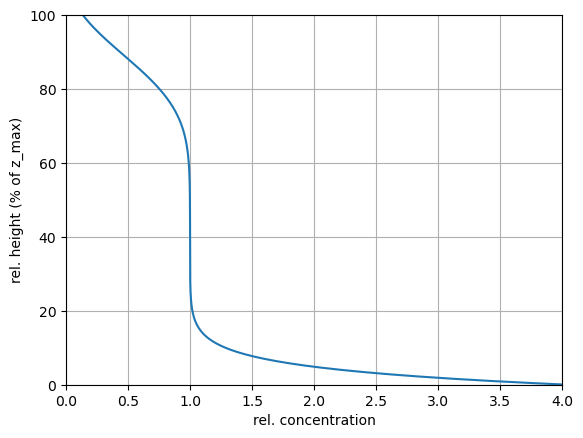

In [11]:
plt.plot(solnc, solnz/z_max * 100)
plt.grid(visible = True)
plt.ylim(0,100)
plt.xlim(0,_relmax)
plt.xlabel('rel. concentration')
plt.ylabel('rel. height (% of z_max)')